In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("default of credit card clients.xls")
df

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [3]:
df.nunique()

Unnamed: 0    30001
X1               82
X2                3
X3                8
X4                5
X5               57
X6               12
X7               12
X8               12
X9               12
X10              11
X11              11
X12           22724
X13           22347
X14           22027
X15           21549
X16           21011
X17           20605
X18            7944
X19            7900
X20            7519
X21            6938
X22            6898
X23            6940
Y                 3
dtype: int64

### Feature Catagorizing

* Catagorical Features : SEX , Marriage 
* Ordinal Features : Education , PAY_[X]
* Numerical Features : BILL_AMT[X] , PAY_AMT[X]

In [4]:
df = pd.read_excel("default of credit card clients.xls",header=1)

### Data Exploration & Feature Engineering

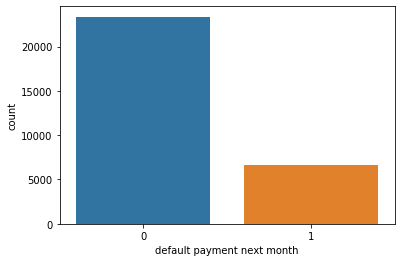

In [5]:
sns.countplot(df["default payment next month"],data=df)

* Highly imbalanced data

In [6]:
df["default payment next month"].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

In [7]:
print("Basic Accuracy : ",23364/30000)

Basic Accuracy :  0.7788


## NOTE:-
* It is highly imbalanced data if we predict every class as 0 blindly so we wil get 77.8% accuracy as you can see above


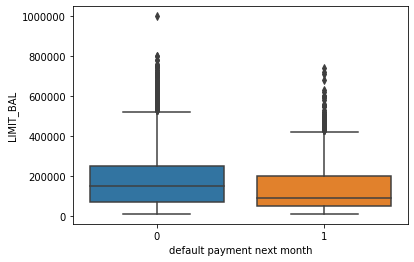

In [8]:
sns.boxplot(x = "default payment next month" , y="LIMIT_BAL" , data=df )

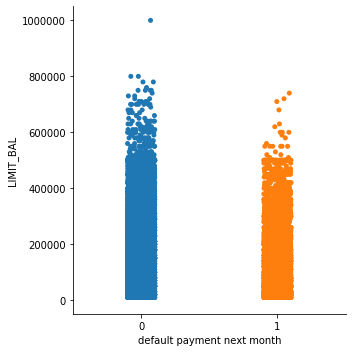

In [9]:
sns.catplot(x="default payment next month",y="LIMIT_BAL",data=df)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


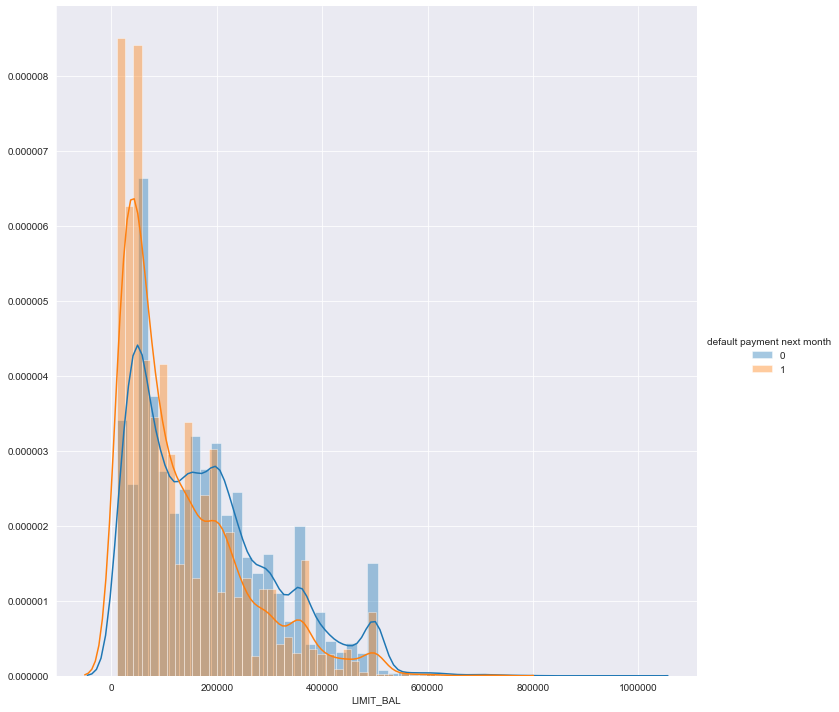

In [10]:
sns.set_style("darkgrid")

sns.FacetGrid(df , hue="default payment next month" , size=10).map(sns.distplot, "LIMIT_BAL").add_legend()
plt.show()

###  Observation 1
* Customers which are having high limit balance majorly belongs to non default payer catagory

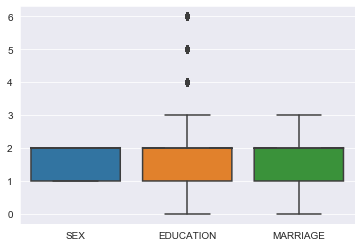

In [11]:
sns.boxplot(data=df[['SEX', 'EDUCATION', 'MARRIAGE']],
                notch ='True')#,hue="default payment next month")

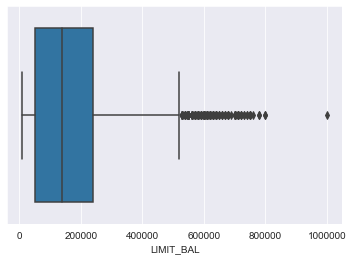

In [12]:
sns.boxplot(x = "LIMIT_BAL"  , data=df,hue='default payment next month' )

In [13]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

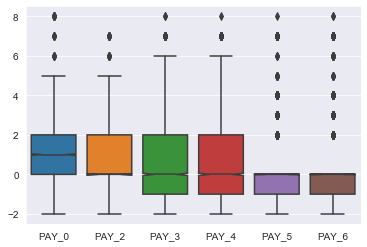

In [14]:
sns.boxplot(data=df[df['default payment next month']==1][['PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']],
                notch ='True')#,hue="default payment next month")

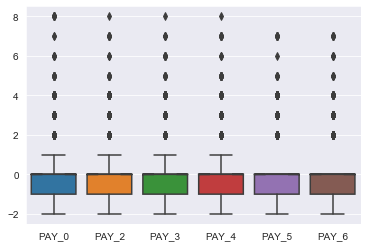

In [15]:
sns.boxplot(data=df[df['default payment next month']==0][['PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']],
                notch ='True')#,hue="default payment next month")

## Observation-2
* we can notice from box plot that mostly late payers are going to pay default next month.
* Majority of non default payers have paid before or on time.

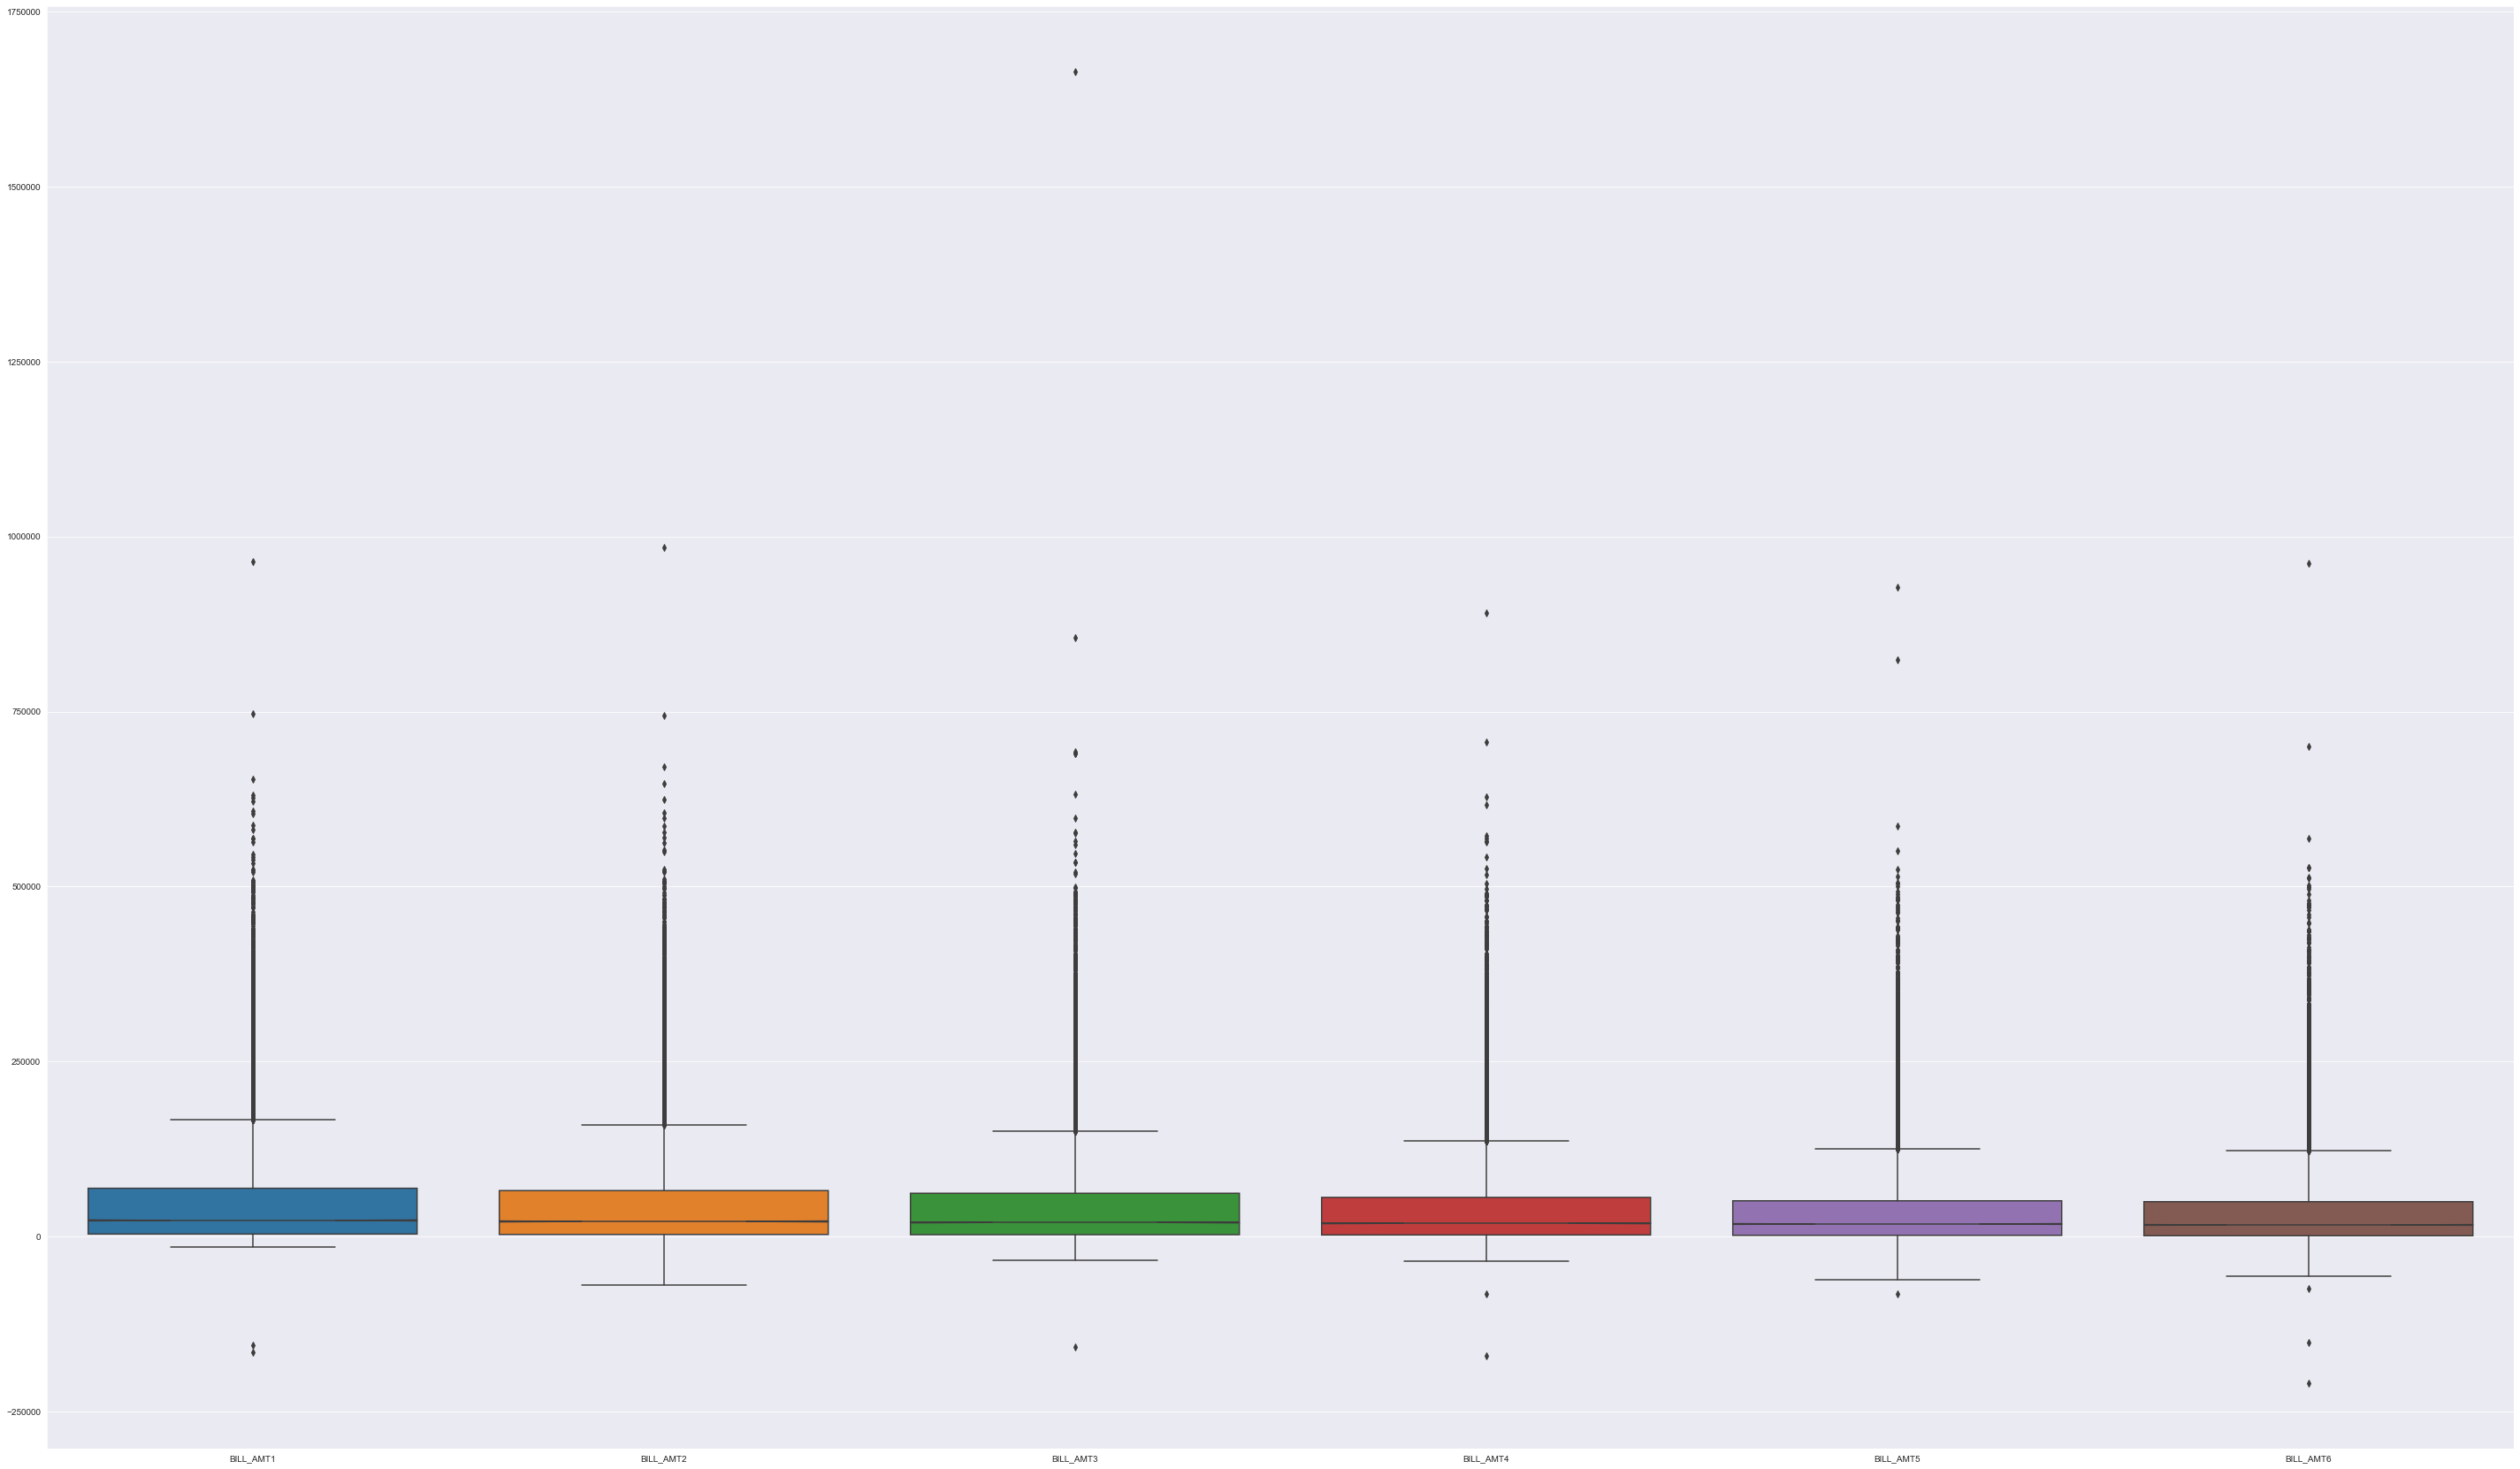

In [16]:
plt.figure(figsize=(50,30))
sns.boxplot(data=df[df['default payment next month']==0][['BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']],
                notch ='True')#,hue="default payment next month")
plt.show()

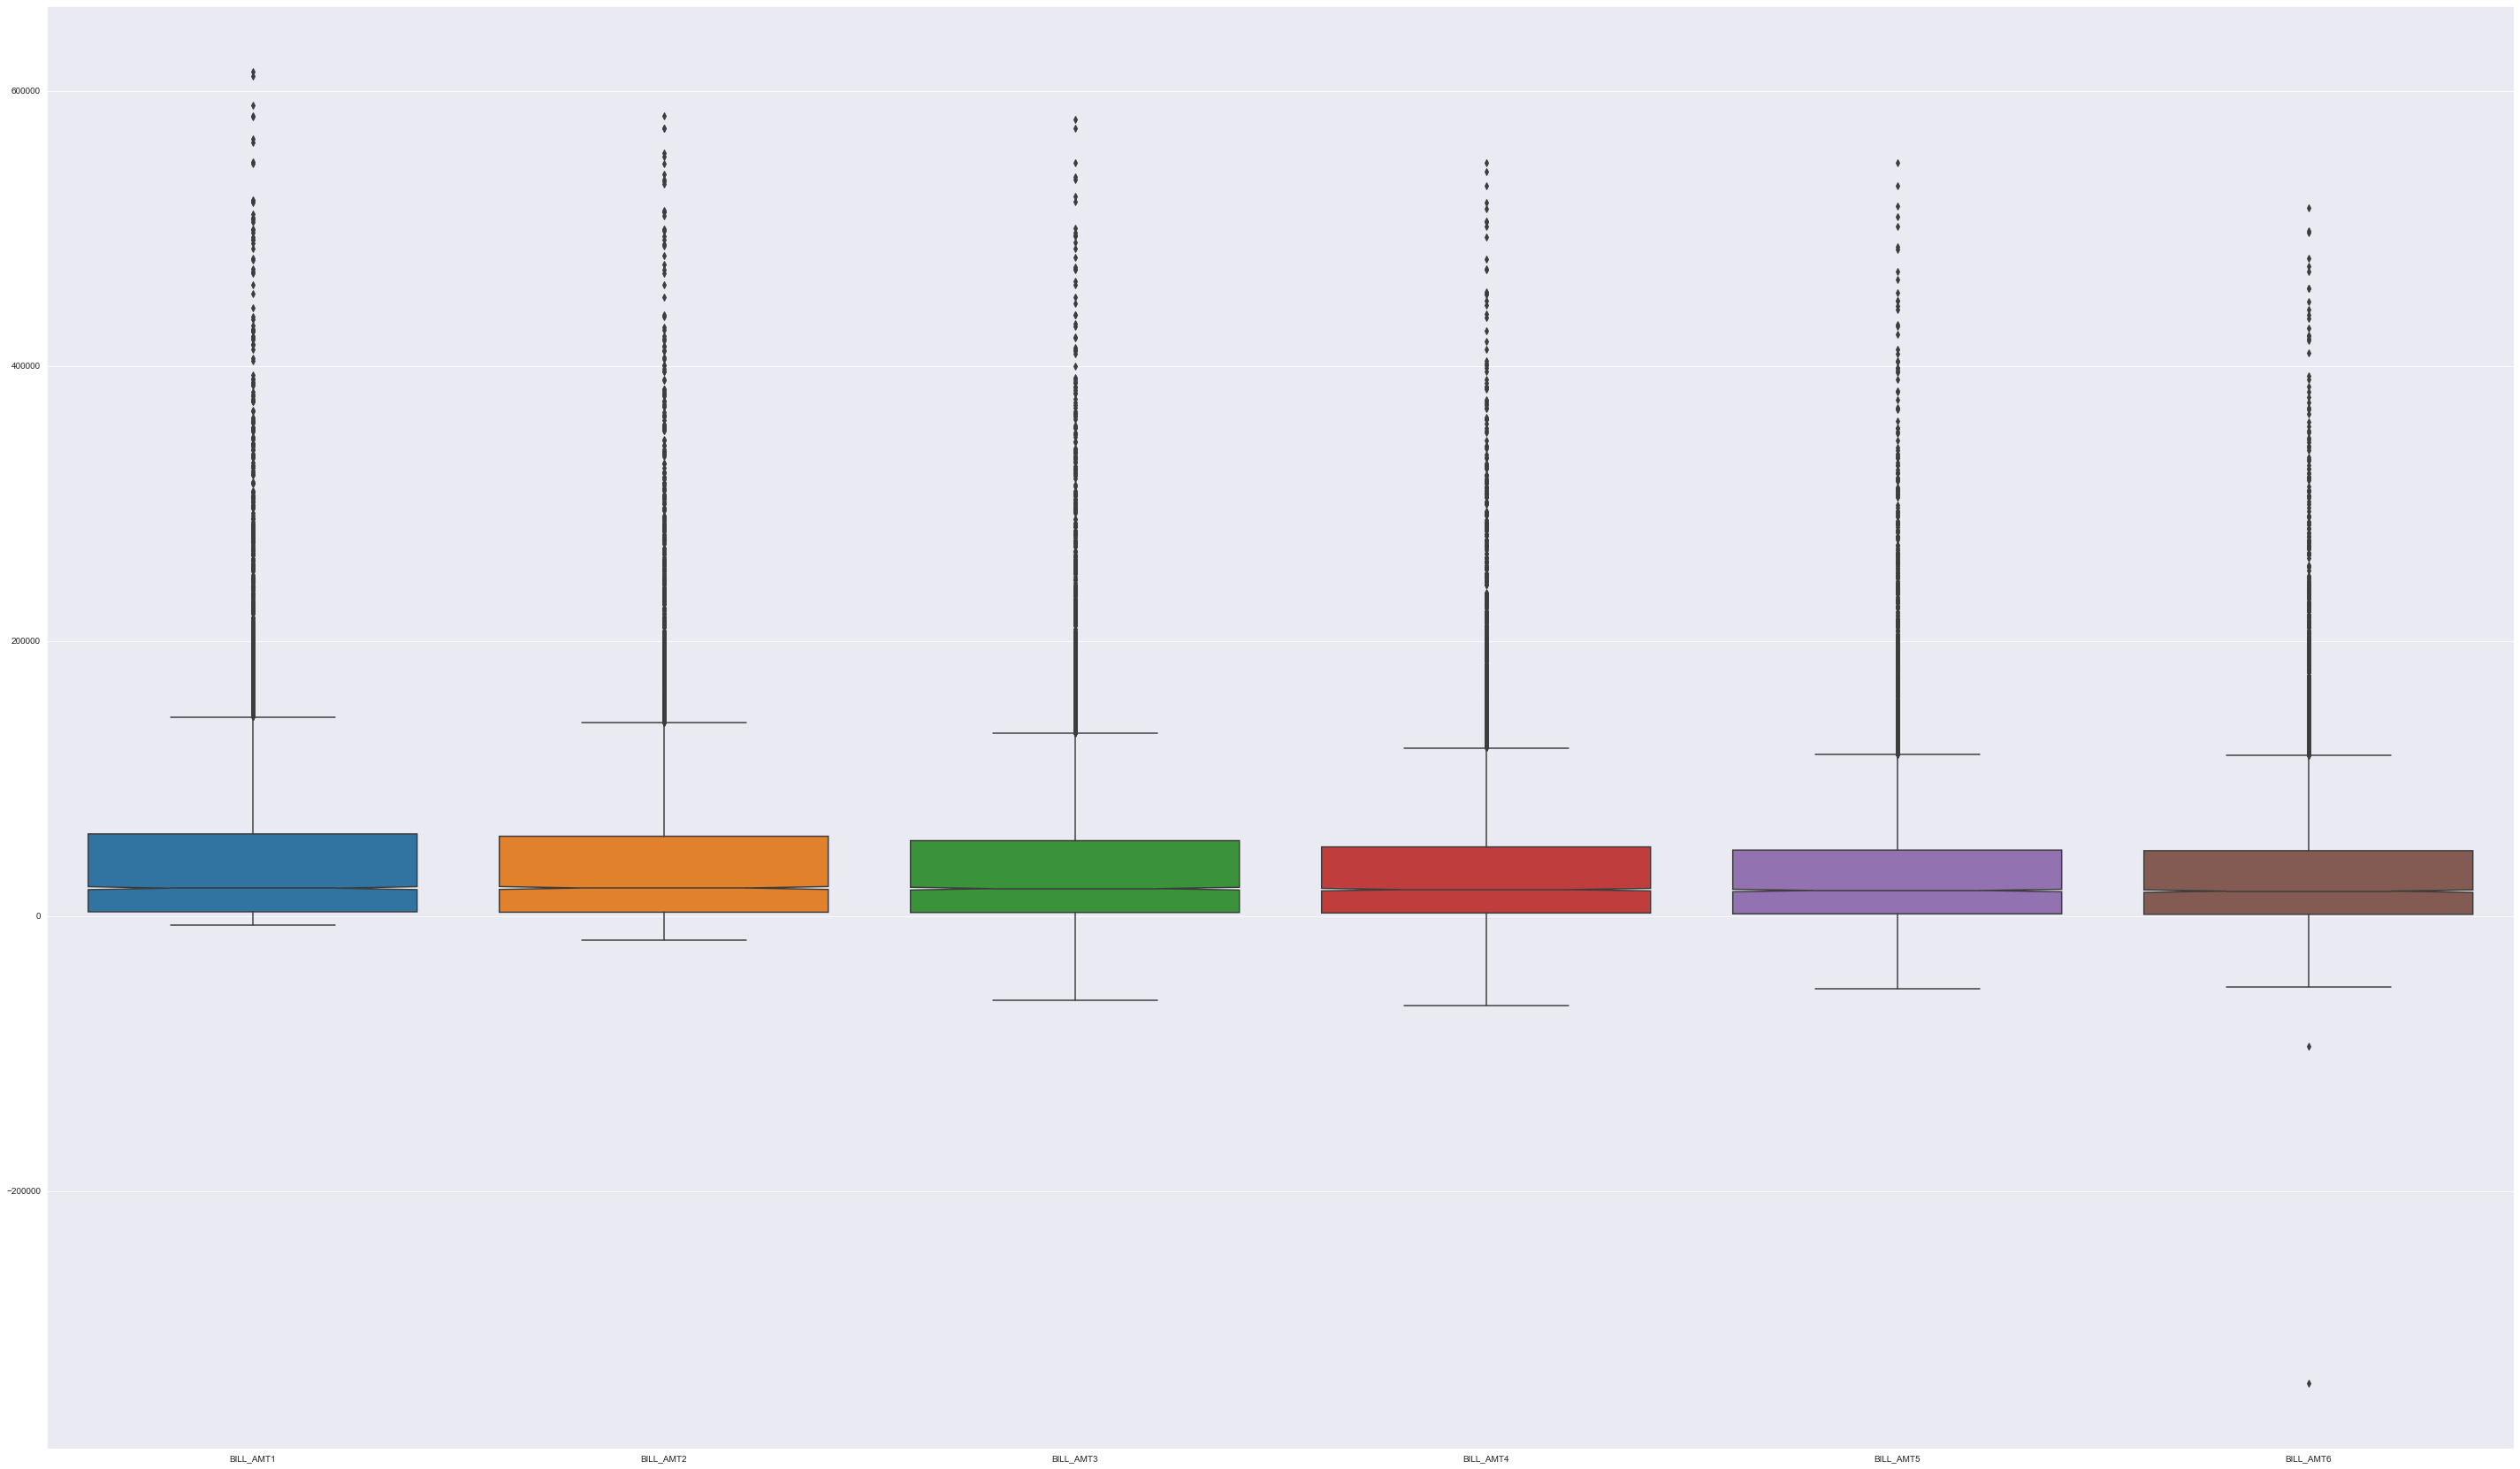

In [17]:
plt.figure(figsize=(50,30))
sns.boxplot(data=df[df['default payment next month']==1][['BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']],
                notch ='True')#,hue="default payment next month")
plt.show()

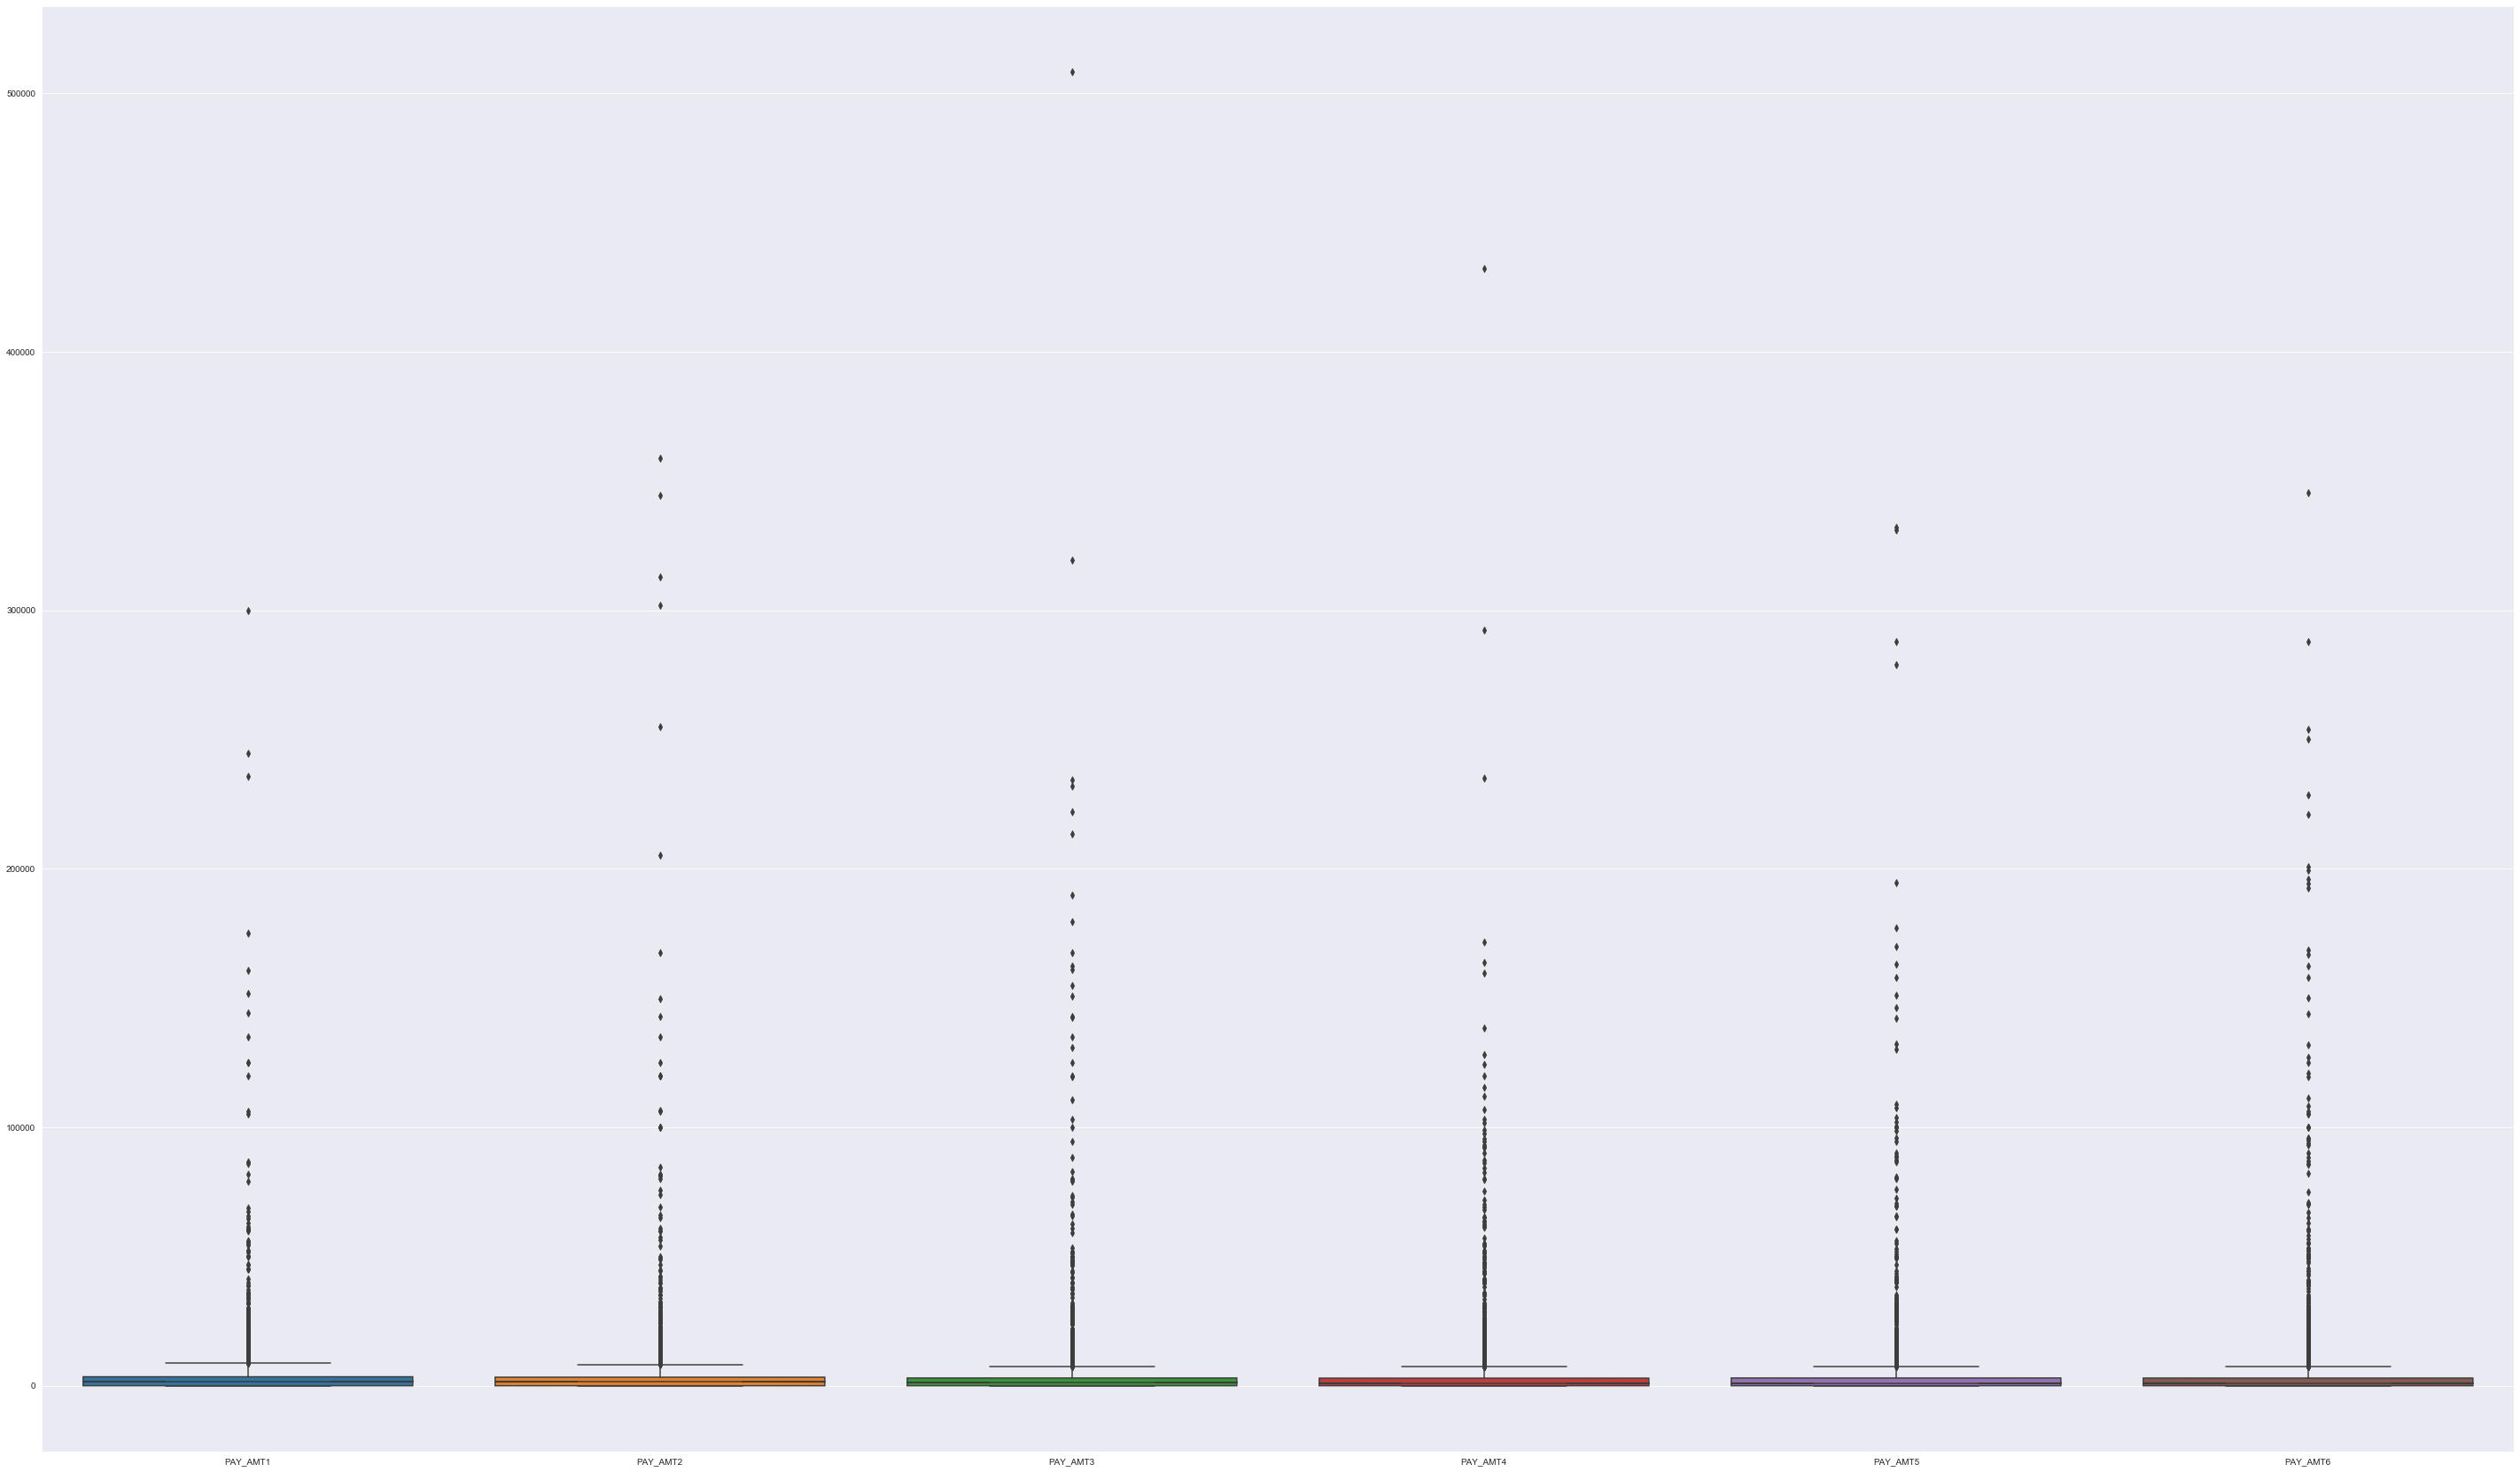

In [18]:
plt.figure(figsize=(50,30))
sns.boxplot(data=df[df['default payment next month']==1][['PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']],
                notch ='True')#,hue="default payment next month")
plt.show()

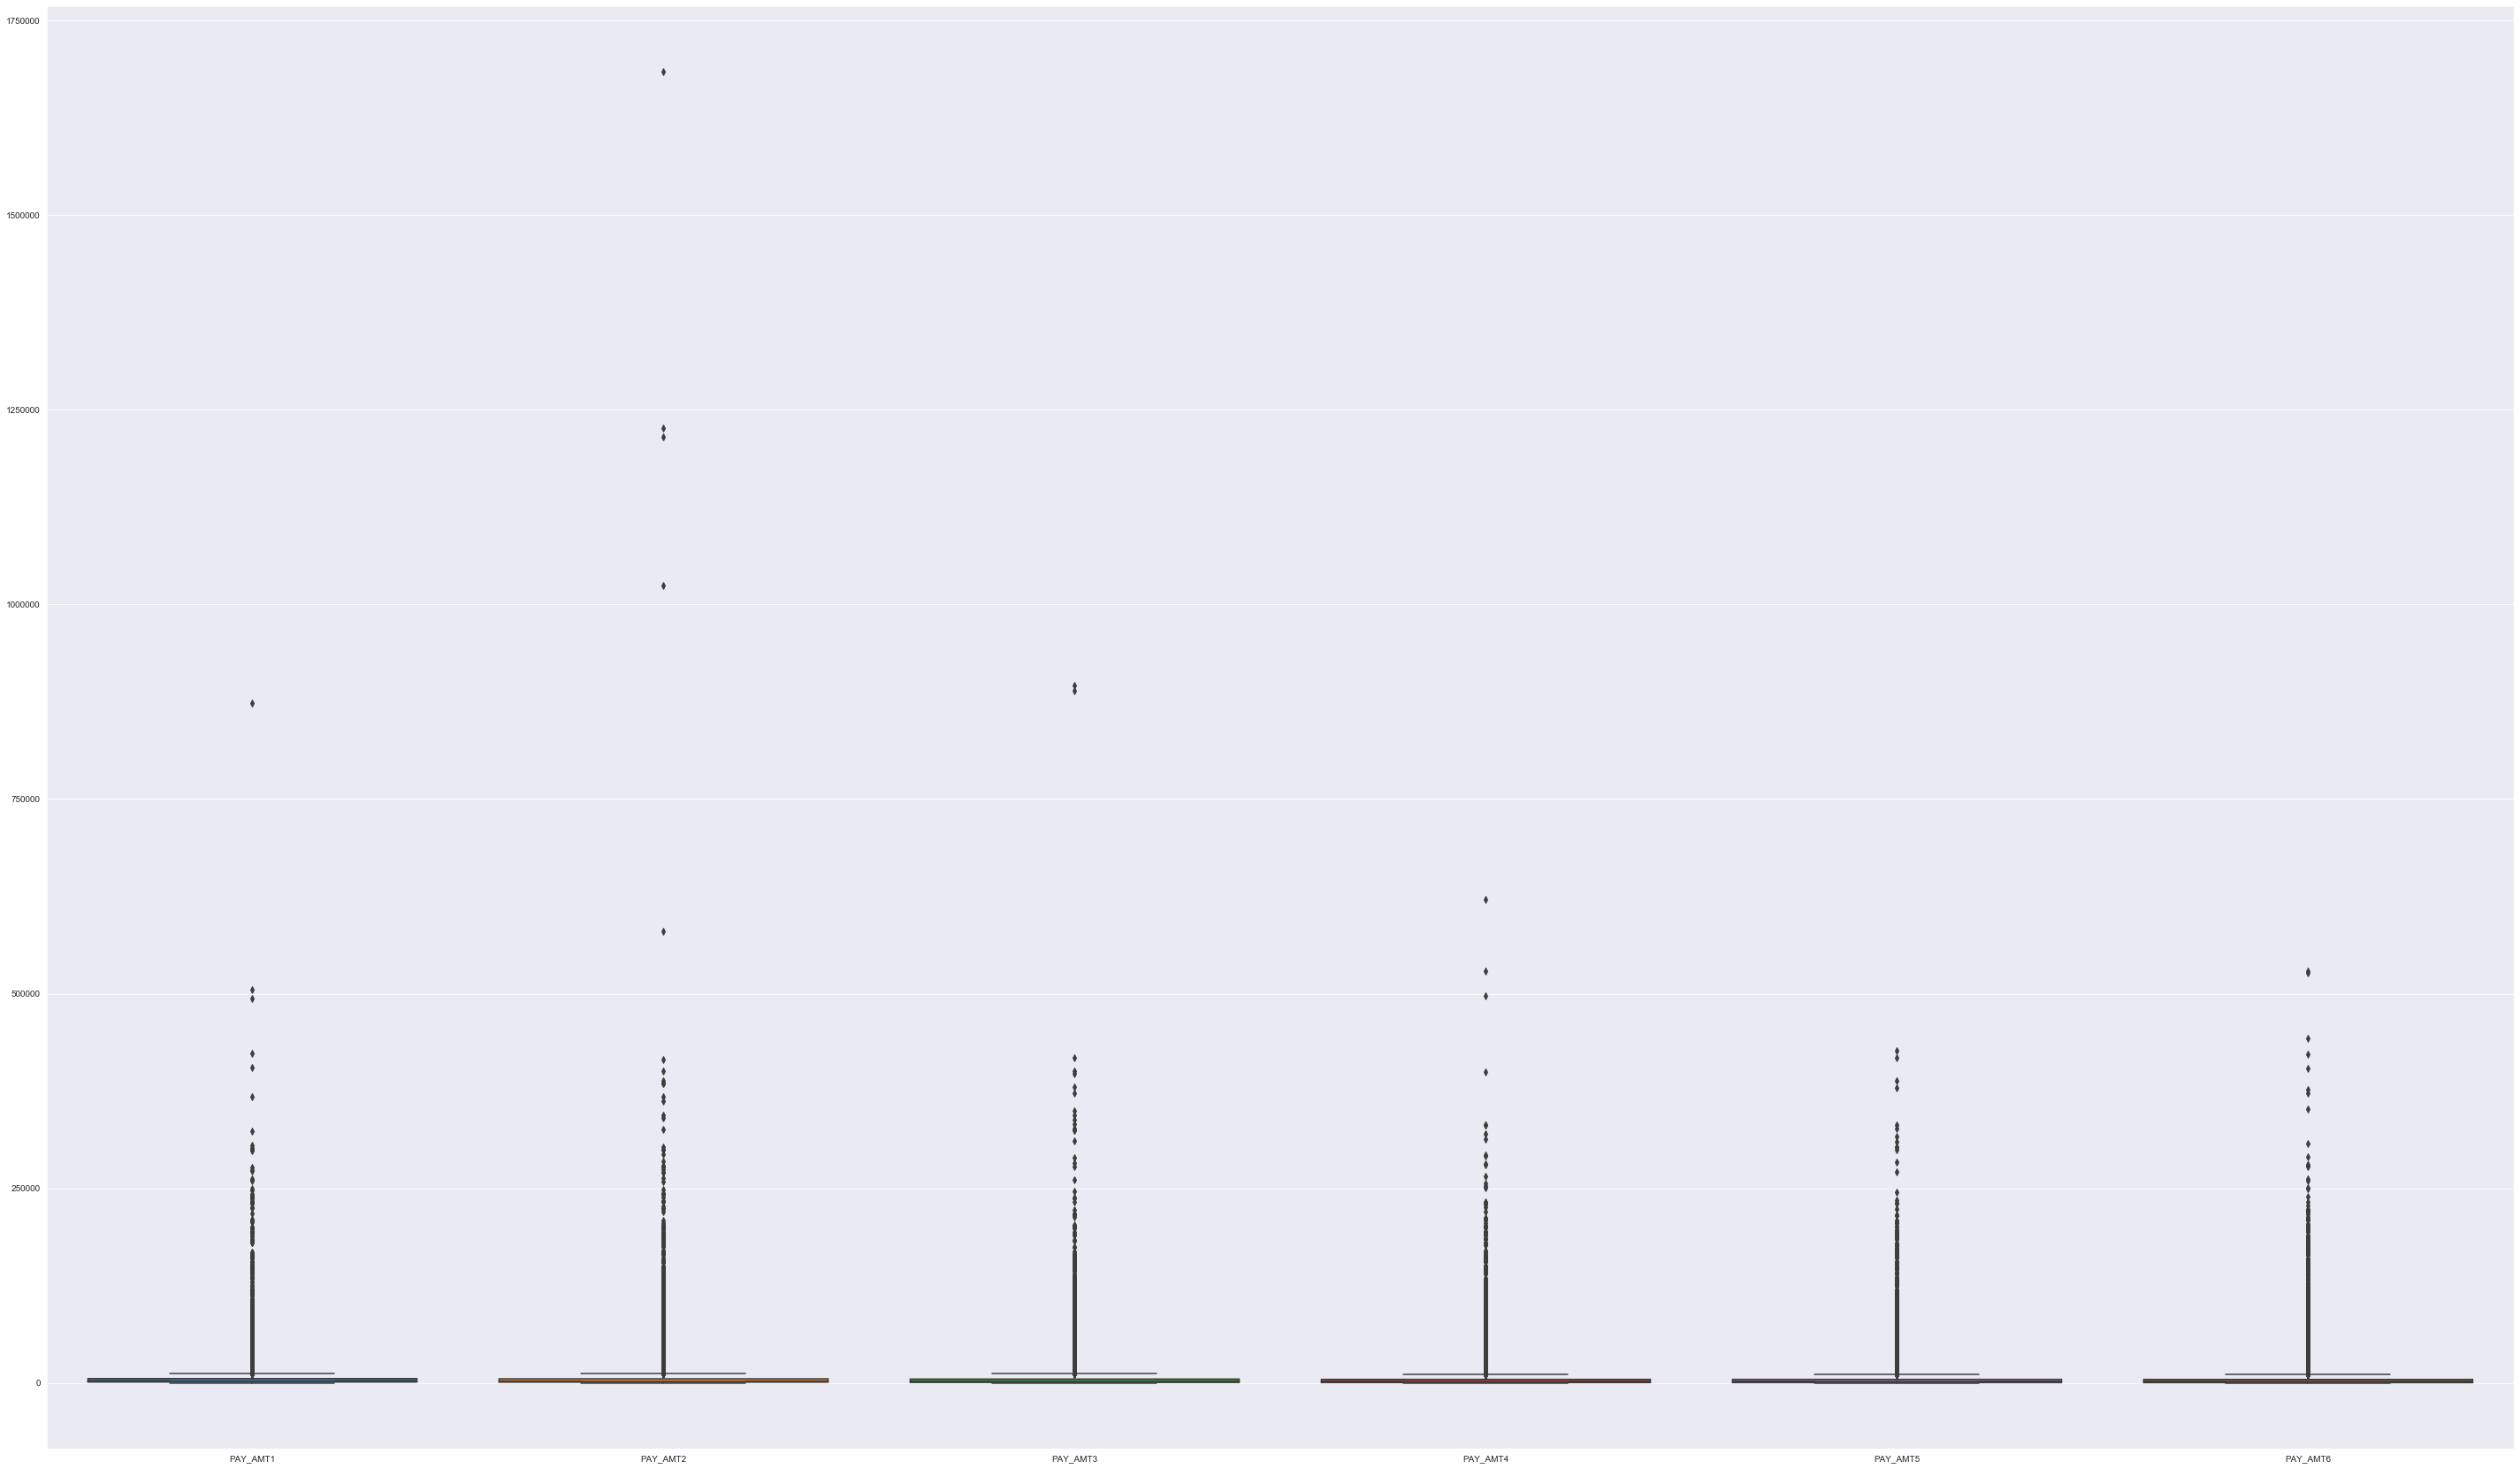

In [19]:
plt.figure(figsize=(50,30))
sns.boxplot(data=df[df['default payment next month']==0][['PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']],
                notch ='True')#,hue="default payment next month")
plt.show()

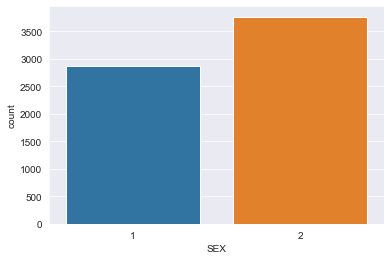

In [20]:
sns.countplot(df[df["default payment next month"]==1]["SEX"],data=df)

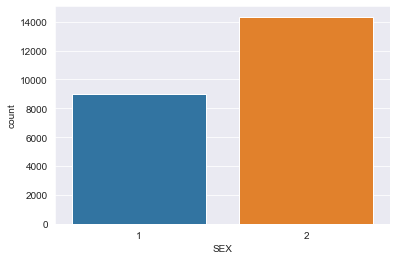

In [21]:
sns.countplot(df[df["default payment next month"]==0]["SEX"],data=df)

### Checking for missing values

In [22]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

* No null value

### Checking for highly correalted features

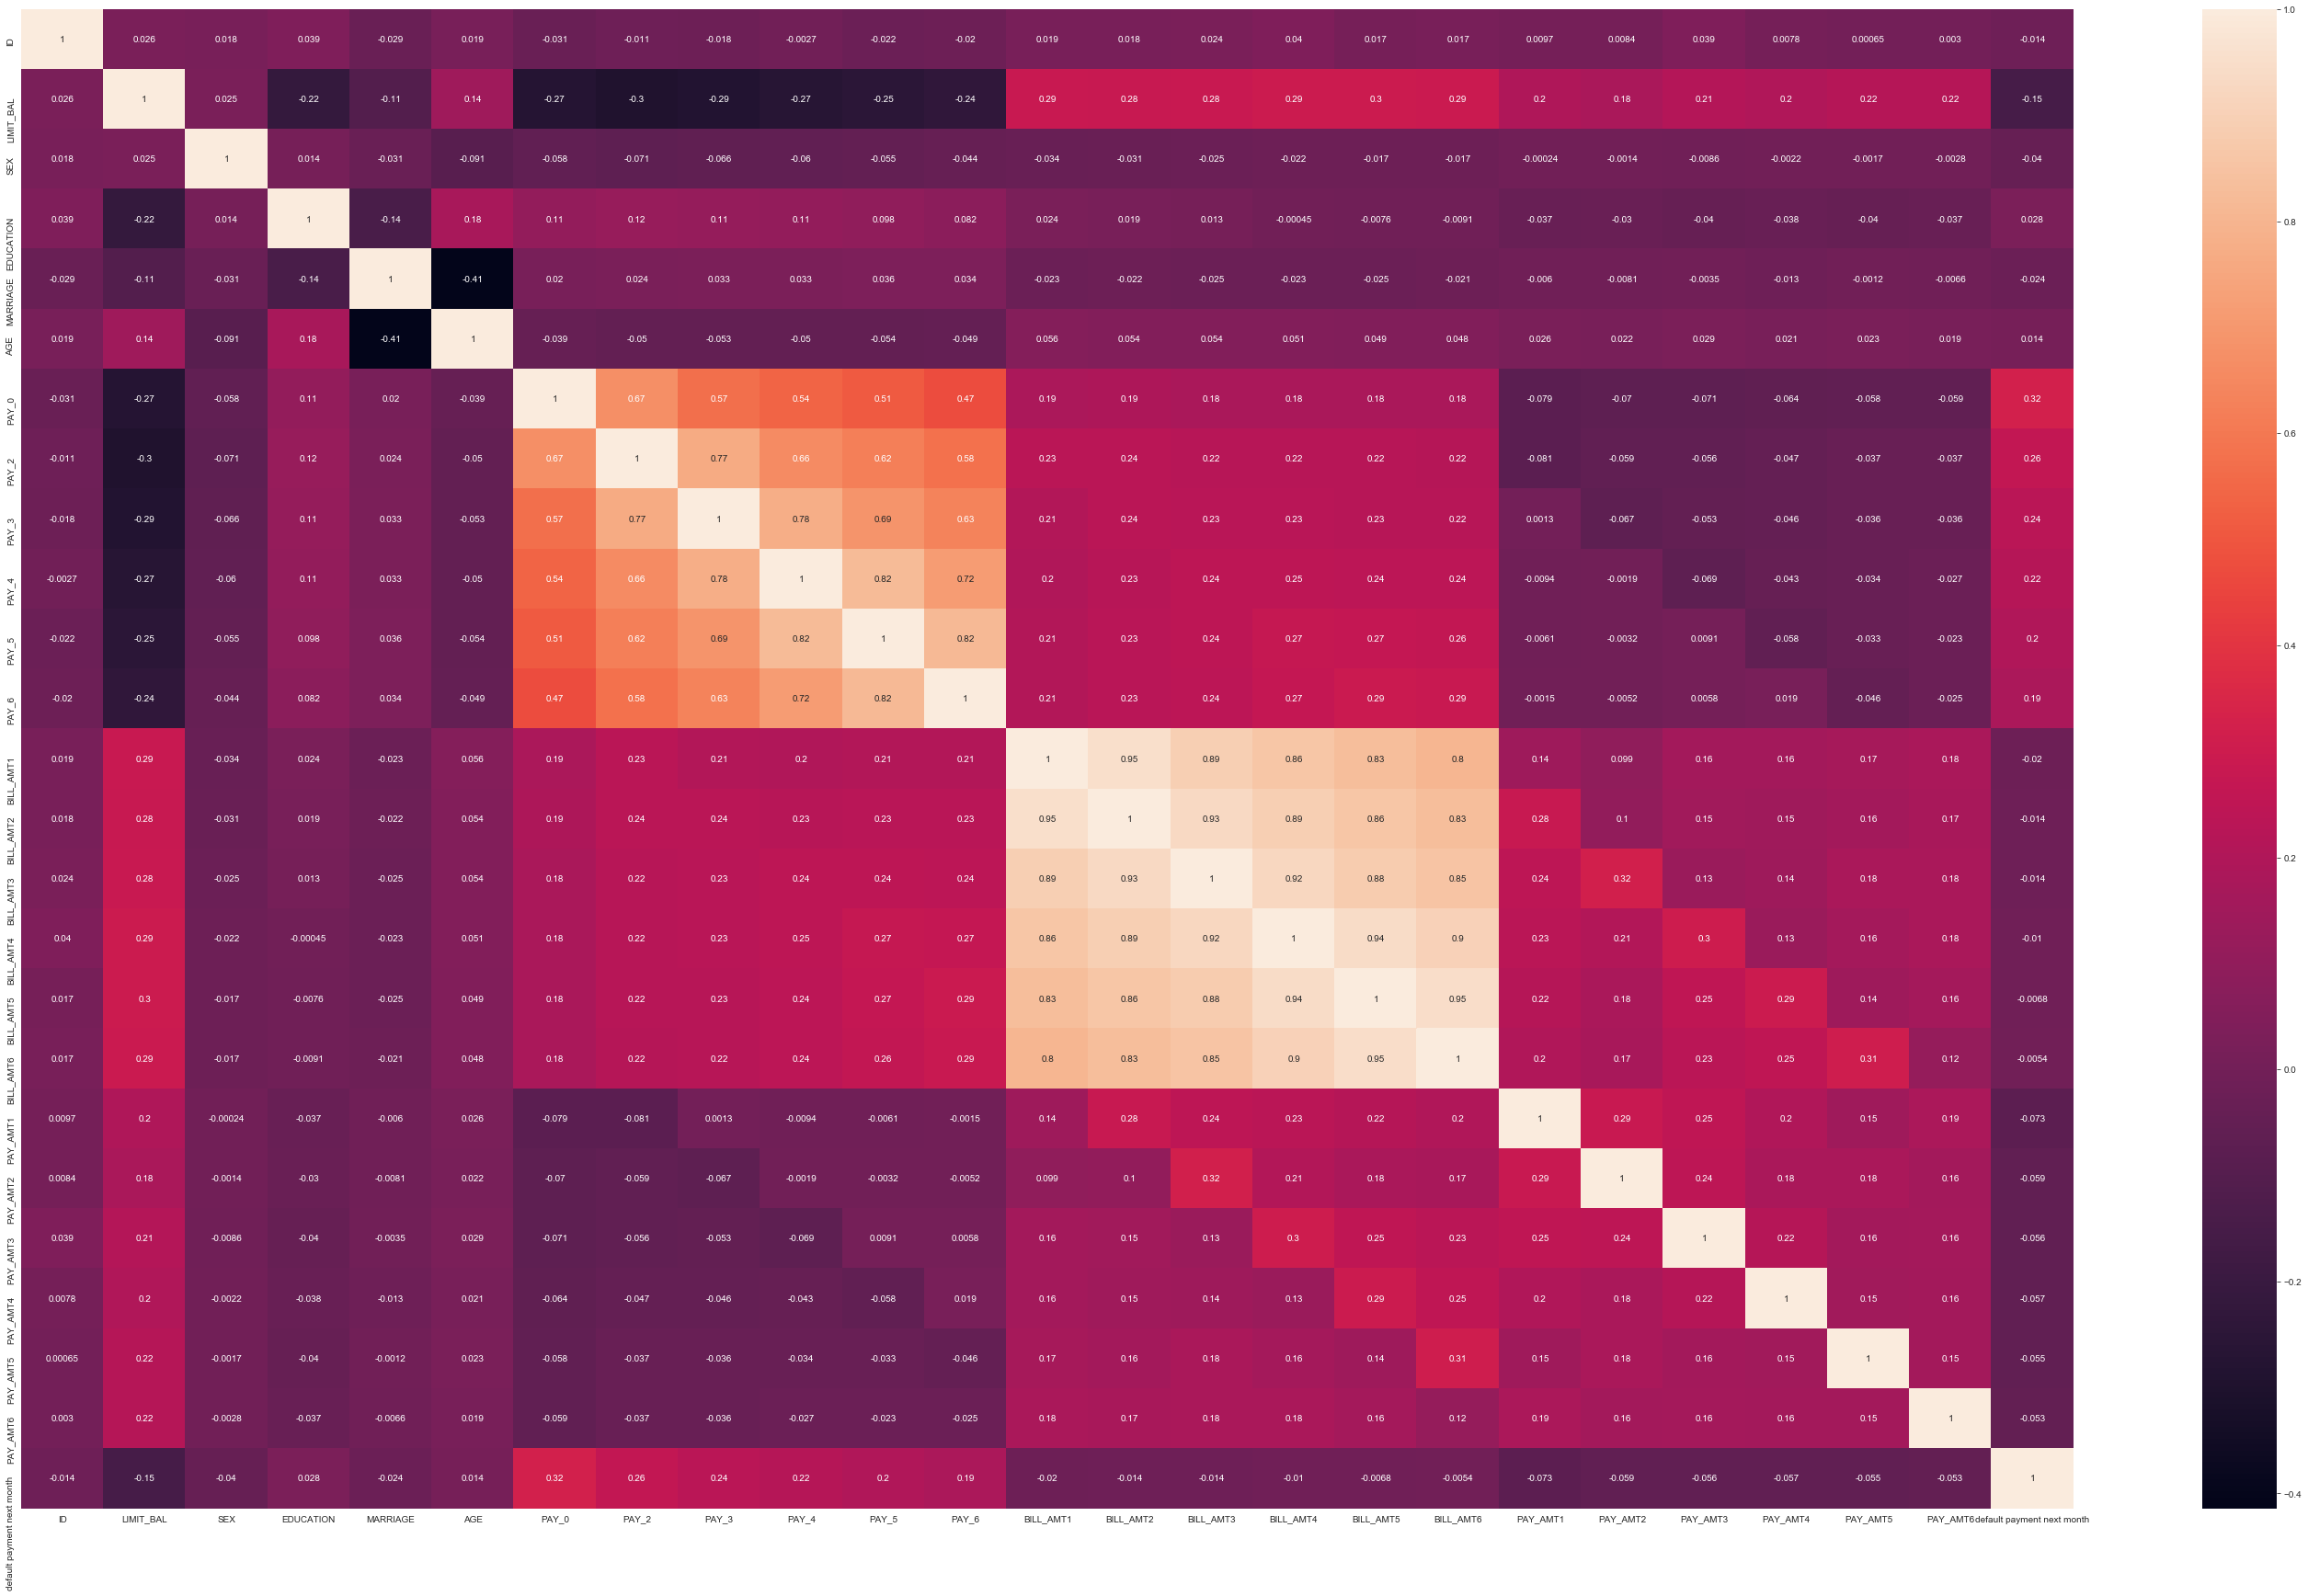

In [23]:
plt.figure(figsize=(50,30))
sns.heatmap(df.corr(),annot=True)
plt.show()

### Checking for low variance features

In [24]:
df.var()

ID                            7.500250e+07
LIMIT_BAL                     1.683446e+10
SEX                           2.392474e-01
EDUCATION                     6.246510e-01
MARRIAGE                      2.724523e-01
AGE                           8.496976e+01
PAY_0                         1.262930e+00
PAY_2                         1.433254e+00
PAY_3                         1.432492e+00
PAY_4                         1.366885e+00
PAY_5                         1.284114e+00
PAY_6                         1.322472e+00
BILL_AMT1                     5.422240e+09
BILL_AMT2                     5.065705e+09
BILL_AMT3                     4.809338e+09
BILL_AMT4                     4.138716e+09
BILL_AMT5                     3.696294e+09
BILL_AMT6                     3.546692e+09
PAY_AMT1                      2.743423e+08
PAY_AMT2                      5.308817e+08
PAY_AMT3                      3.100051e+08
PAY_AMT4                      2.454286e+08
PAY_AMT5                      2.334266e+08
PAY_AMT6   

In [25]:
df = df.drop(['ID'],axis=1)
df.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Separating Dependent and Independent Features

In [26]:
y = df['default payment next month'].values                    # target feature
x = df.drop(['default payment next month'],axis=1)      # Independent feature

In [74]:
from sklearn.model_selection import train_test_split , StratifiedKFold

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, stratify=y, random_state = 17)

In [29]:
type(y_test)

numpy.ndarray

### Scaling of Data

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Model Implementation 

#### Utility functions for model evaluation  

In [58]:
from sklearn.metrics import confusion_matrix , average_precision_score

def ConfusionMat(model):
    cm = confusion_matrix(y_test, model.predict(X_test))

    TN = cm[0][0]
    TP = cm[1][1]
    FN = cm[1][0]
    FP = cm[0][1]

    print(cm)
    print("Model[{}] Testing Accuracy =",((TP + TN) / (TP + TN + FN + FP)))
    print()# Print a new line
    print("Model[{}] ROC_AUC Score =",roc_auc_score(y_test, model.predict(X_test)))

In [59]:
def mat_eval(model,x_test,y_test):
    y_pred =  model.predict(X_test)
    print(pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'],margins=True))
    
    print("average_precision_score", average_precision_score(y_test,y_pred))
    



#### Utility function for RandomSearchCV  & GridSearchCV-- Hypertuning

In [5]:
def randomsearchcv(model, params_grid):
    rsv = RandomizedSearchCV(model, params_grid, n_iter=50, n_jobs=-1, cv=StratifiedKFold(n_splits=5), scoring='roc_auc')
    rsv.fit(X_train, y_train)

    print('Best score:', rsv.best_score_)
    print('Best score:', rsv.best_params_)
    return rsv

In [6]:
def gridsearchcv(model,param_grid):
    gcv = GridSearchCV(log, param_grid, n_jobs=-1, cv=StratifiedKFold(n_splits=10), scoring='roc_auc')
    gcv.fit(X_train,y_train)
    print('Best score:', gcv.best_score_)
    print('Best score:', gcv.best_params_)
    return gcv

### Model -1 Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 0 , class_weight={1:1.5 , 0:0.5} , penalty='l2')
log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight={0: 0.5, 1: 1.5}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
from sklearn.metrics import roc_auc_score

ConfusionMat(log)
print()
print()
mat_eval(log , X_test,y_test)

[[3898  775]
 [ 609  718]]
Model[{}] Testing Accuracy = 0.7693333333333333

Model[{}] ROC_AUC Score = 0.6876118657567378


Predicted     0     1   All
Actual                     
0          3898   775  4673
1           609   718  1327
All        4507  1493  6000
average_precision_score 0.3617065100587469




* true negative (Customer who get predicted to as non default payers and were actually non default payers)  =  3898

* true positive (Customer who get predicted to as default payers and were actually default payers) = 718

* false positive (Customer who get predicted to as default payers and were actually non default payers) = 775

* false negative (Customer who get predicted to as non default payers and were actually default payers) = 609

#### In this particular problem False Positive should be minimum so we have to maximise the Precision score so this model is not giving good results.

### Model-2 Support Vector Classifier

In [4]:
'''from sklearn.svm import SVC
svc_lin = SVC(kernel = 'linear', random_state = 0)
svc_lin.fit(X_train, y_train)'''


#Due to Computational iisue of computer this was not giving results

"from sklearn.svm import SVC\nsvc_lin = SVC(kernel = 'linear', random_state = 0)\nsvc_lin.fit(X_train, y_train)"

### Hypertuning of SVC 

In [35]:
'''
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,StratifiedKFold
from sklearn.svm import SVC
param_grid = {
    'C': [0.1,1,10,100],
    'gamma':[1,0.1,0.01,0.001,0.0001,10],
    'kernel':['linear','rbf']
}
gs4 = RandomizedSearchCV(SVC(), param_grid, n_jobs=-1,n_iter=20, cv=StratifiedKFold(n_splits=10), scoring='roc_auc')
gs4.fit(X_train,y_train)
print('Best score:', gs4.best_score_)
print('Best score:', gs4.best_params_)
''' 

"\nfrom sklearn.model_selection import GridSearchCV,RandomizedSearchCV,StratifiedKFold\nfrom sklearn.svm import SVC\nparam_grid = {\n    'C': [0.1,1,10,100],\n    'gamma':[1,0.1,0.01,0.001,0.0001,10],\n    'kernel':['linear','rbf']\n}\ngs4 = RandomizedSearchCV(SVC(), param_grid, n_jobs=-1,n_iter=20, cv=StratifiedKFold(n_splits=10), scoring='roc_auc')\ngs4.fit(X_train,y_train)\nprint('Best score:', gs4.best_score_)\nprint('Best score:', gs4.best_params_)\n"

### Model-3 Decision Tree 

* As the data is highly imbalanced i am providing the class weight

In [62]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0 , class_weight={1:10 , 0:0.5})
tree.fit(X_train, y_train)
    

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 0.5, 1: 10},
                       criterion='entropy', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')

In [63]:
ConfusionMat(tree)
mat_eval(tree , X_test,y_test)

[[3824  849]
 [ 801  526]]
Model[{}] Testing Accuracy = 0.725

Model[{}] ROC_AUC Score = 0.6073504076957029
Predicted     0     1   All
Actual                     
0          3824   849  4673
1           801   526  1327
All        4625  1375  6000
average_precision_score 0.28513444543399324


In [39]:
'''
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,StratifiedKFold


param_grid  = {
    "criterion":['gini','entropy'],
    "max_depth":range(1,30),
    "min_samples_split":range(1,20),
    "min_samples_leaf":range(1,15)
}
model_5 = GridSearchCV(DecisionTreeClassifier(), param_grid, n_jobs=-1, cv=StratifiedKFold(n_splits=10), scoring='roc_auc')
model_5.fit(X_train,y_train)
print('Best score:', model_5.best_score_)
print('Best score:', model_5.best_params_)
'''

'\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.model_selection import GridSearchCV,RandomizedSearchCV,StratifiedKFold\n\n\nparam_grid  = {\n    "criterion":[\'gini\',\'entropy\'],\n    "max_depth":range(1,30),\n    "min_samples_split":range(1,20),\n    "min_samples_leaf":range(1,15)\n}\nmodel_5 = GridSearchCV(DecisionTreeClassifier(), param_grid, n_jobs=-1, cv=StratifiedKFold(n_splits=10), scoring=\'roc_auc\')\nmodel_5.fit(X_train,y_train)\nprint(\'Best score:\', model_5.best_score_)\nprint(\'Best score:\', model_5.best_params_)\n'

### Model - 4 XgBoost

In [80]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from xgboost import XGBClassifier

params = {
    'n_estimators': [400,500],
    'learning_rate': [0.01,0.05,0.1,0.2],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1,],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1],
    'max_depth':range(1,10),
    'min_child_weight': range(4,8),
    'objective':['binary:logistic'],
    'eval_metric':['auc','error']
}

gs2 = RandomizedSearchCV(XGBClassifier(n_jobs=-1), params, n_jobs=-1, cv=StratifiedKFold(n_splits=5), scoring='roc_auc')
gs2.fit(X_train, y_train)

print('Best score:', gs2.best_score_)
print('Best score:', gs2.best_params_)

C:\Users\Lenovo\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best score: 0.7799333384027619
Best score: {'reg_lambda': 5, 'reg_alpha': 1, 'objective': 'binary:logistic', 'n_estimators': 400, 'min_child_weight': 7, 'max_depth': 2, 'learning_rate': 0.1, 'gamma': 0, 'eval_metric': 'auc', 'booster': 'gbtree', 'base_score': 0.5}


In [79]:
xgclf = XGBClassifier(reg_lambda= 1, reg_alpha= 0, objective= 'binary:logistic', n_estimators= 400, min_child_weight = 5, max_depth = 6, learning_rate = 0.2, gamma = 0.5, eval_metric= 'error', booster= 'gbtree', base_score= 0.5)

xgclf.fit(X_train,y_train)
ConfusionMat(xgclf)
mat_eval(xgclf, X_test,y_test)

[[4365  308]
 [ 851  476]]
Model[{}] Testing Accuracy = 0.8068333333333333

Model[{}] ROC_AUC Score = 0.6463966466437814
Predicted     0    1   All
Actual                    
0          4365  308  4673
1           851  476  1327
All        5216  784  6000
average_precision_score 0.359617809595579


### Model-5 Neural Network 

In [56]:
import pandas
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import cross_val_score


In [42]:
!pip install pydot
import pydot
import graphviz

In [43]:
!pip install graphviz

In [44]:
!pip install pydotplus

In [45]:
import pydotplus

In [46]:
from tensorflow.keras import layers , models , metrics
from tensorflow.keras.utils import plot_model
NN = models.Sequential()
NN.add(layers.Dense(23,activation='relu'))
NN.add(layers.Dense(15,activation='relu'))
NN.add(layers.Dense(10,activation='relu'))
NN.add(layers.Dense(5,activation='relu'))
NN.add(layers.Dense(3,activation='relu'))
NN.add(layers.Dense(1,activation='sigmoid'))


In [71]:
NN.compile(optimizer='adamax', loss='binary_crossentropy',metrics=[metrics.AUC() , "accuracy"])

history = NN.fit(X_train , y_train , batch_size=50, epochs=100,verbose =1)

Epoch 1/100
24000/24000 [==============================] - 2s 94us/sample - loss: 0.4118 - auc_2: 0.8022 - accuracy: 0.8289
Epoch 2/100
24000/24000 [==============================] - 1s 60us/sample - loss: 0.4110 - auc_2: 0.8038 - accuracy: 0.8281
Epoch 3/100
24000/24000 [==============================] - 1s 57us/sample - loss: 0.4110 - auc_2: 0.8032 - accuracy: 0.8292
Epoch 4/100
24000/24000 [==============================] - 1s 46us/sample - loss: 0.4111 - auc_2: 0.8032 - accuracy: 0.8291
Epoch 5/100
24000/24000 [==============================] - 1s 60us/sample - loss: 0.4106 - auc_2: 0.8042 - accuracy: 0.8286
Epoch 6/100
24000/24000 [==============================] - 1s 60us/sample - loss: 0.4106 - auc_2: 0.8042 - accuracy: 0.8289
Epoch 7/100
24000/24000 [==============================] - 1s 57us/sample - loss: 0.4104 - auc_2: 0.8045 - accuracy: 0.8292
Epoch 8/100
24000/24000 [==============================] - 1s 58us/sample - loss: 0.4101 - auc_2: 0.8048 - accuracy: 0.8292
Epoch 9/

In [3]:

import tensorflow.keras.utils
from importlib import reload
reload(tensorflow.keras.utils)


from tensorflow.keras.utils import plot_model    
#plot_model(NN, show_shapes=True, show_layer_names=True)

In [2]:
#plot_model(NN , show_shapes=True, show_layer_names=True)

In [67]:
score = NN.evaluate(X_test,y_test )

y_pred = NN.predict(X_test)



6000/6000 [==============================] - 0s 50us/sample - loss: 0.4431 - auc: 0.7681 - accuracy: 0.8123


In [70]:
print("Precision score : ",average_precision_score(y_test,y_pred))

Precision score :  0.5209128603880286


## BEST MODEL

Neural Network as it is giving AUC score 0.76 and precision score 0.52 & accuracy of 81%

In Machine Learning Model -- XGBoost Classifier is giving 0.35% average precision score and its accuracy is quite among all others models i used i.e 80% and and AUC_ROC score 64% , my accuracy here is more than the base 77% .

NOTE : Need more hypertuning